<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

duplicates = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicates.head())

Number of duplicate rows: 20

First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to ope

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
# Group duplicates by the same subset used to find them
subset_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'CodingActivities']

# Find all rows that are duplicates based on the subset
duplicates_subset = df[df.duplicated(subset=subset_cols, keep=False)]
grouped = duplicates_subset.groupby(subset_cols)

# Count how often values in each column are the same within duplicate groups
similarity_report = {}

for col in duplicates_subset.columns:
    same_count = 0
    total_groups = 0
    for _, group in grouped:
        total_groups += 1
        if group[col].nunique(dropna=False) == 1:  # All values are the same
            same_count += 1
    similarity_report[col] = round(same_count / total_groups, 2)

# Display most consistent columns
similar_columns = {k: v for k, v in similarity_report.items() if v > 0.8}
sorted_similar = dict(sorted(similar_columns.items(), key=lambda x: x[1], reverse=True))

print("🔁 Columns that are frequently identical across duplicates:")
for col, freq in sorted_similar.items():
    print(f"{col}: {freq*100}% identical")

duplicate_columns = ['MainBranch', 'Employment', 'RemoteWork','Country', 'CodingActivities']
duplicates_subset = df[df.duplicated(subset=duplicate_columns, keep=False)]
print("First few duplicate rows based on MainBranch, Employment, and RemoteWork:")
print(duplicates_subset.head())

duplicates_analysis = duplicates_subset.groupby(duplicate_columns).size().reset_index(name='Count')
print("\nAnalysis of duplicates by selected columns (MainBranch, Employment, RemoteWork):")
print(duplicates_analysis)

🔁 Columns that are frequently identical across duplicates:
MainBranch: 100.0% identical
Employment: 100.0% identical
RemoteWork: 100.0% identical
Check: 100.0% identical
CodingActivities: 100.0% identical
Country: 100.0% identical
AINextMuch less integrated: 91.0% identical
AINextLess integrated: 84.0% identical
First few duplicate rows based on MainBranch, Employment, and RemoteWork:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [8]:
!pip install seaborn

/tmp/ipykernel_1921/3418108245.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


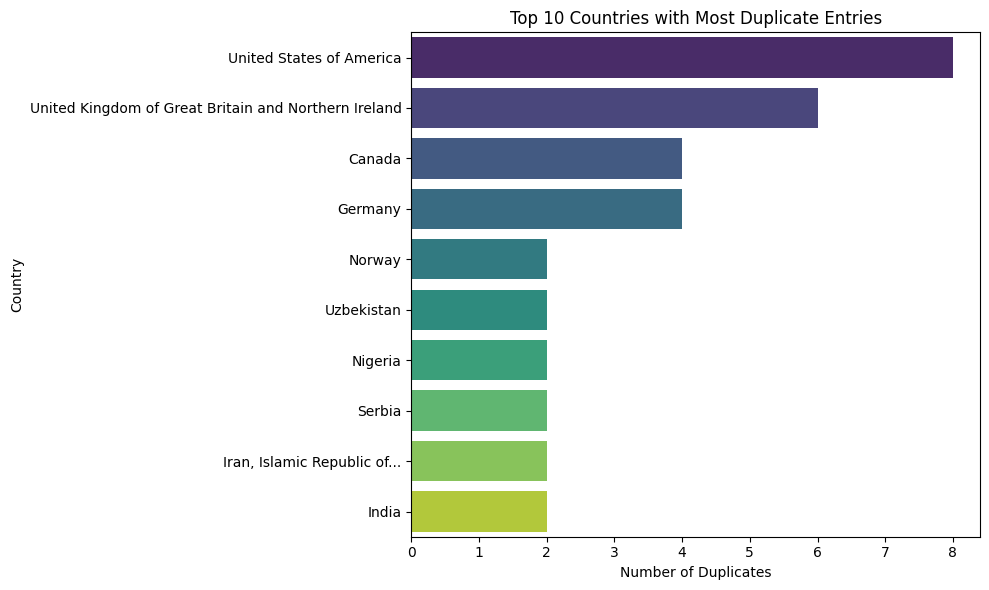

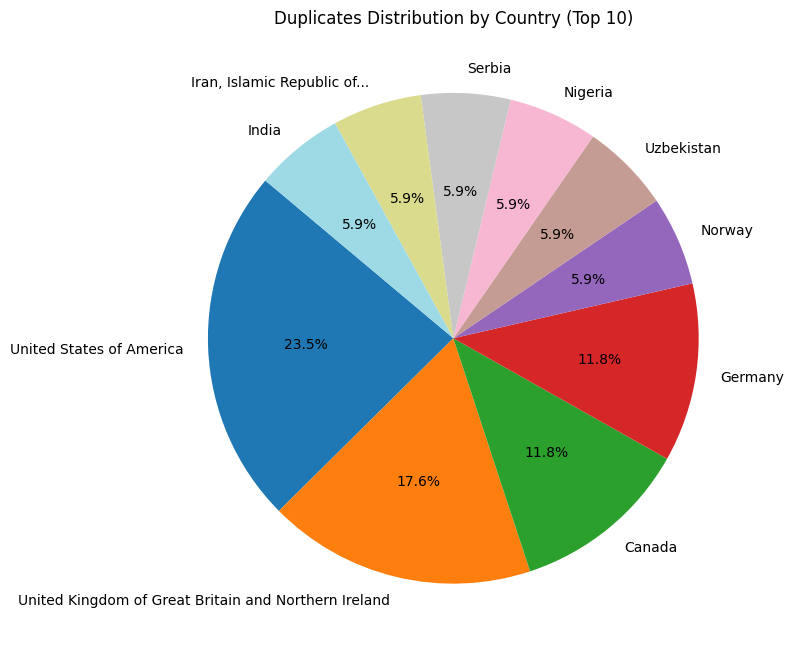

/tmp/ipykernel_1921/3418108245.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_counts.values, y=employment_counts.index, palette='coolwarm')


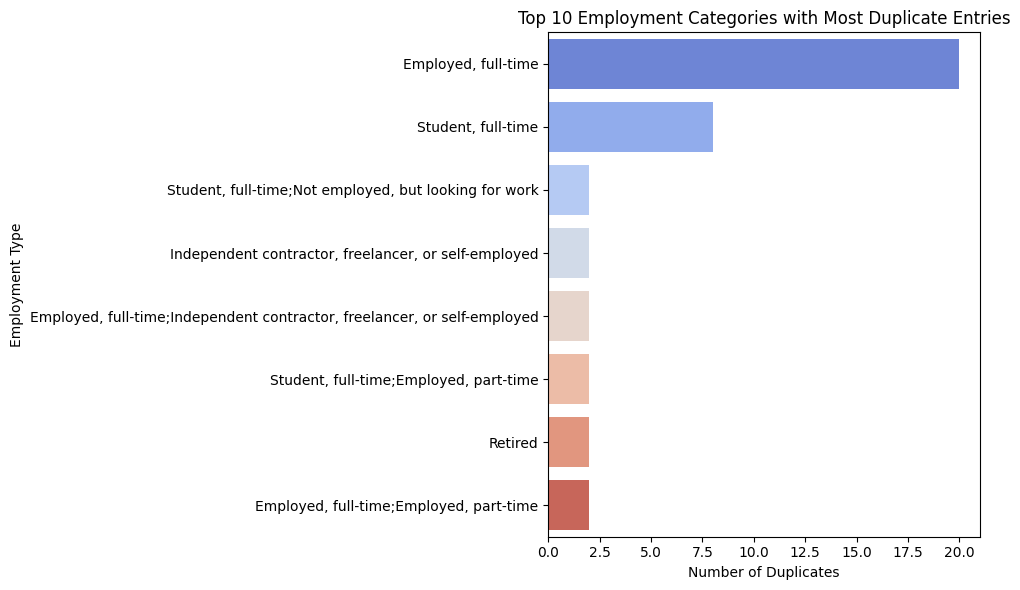

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns

# Step 1: Identify duplicates based on all columns (or a subset if needed)
duplicates = df[df.duplicated(keep=False)]

# Step 2: Distribution by Country
country_counts = duplicates['Country'].value_counts().head(10)  # Top 10 for clarity

# Bar plot for Country
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries with Most Duplicate Entries')
plt.xlabel('Number of Duplicates')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Pie chart for Country (optional)
plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Duplicates Distribution by Country (Top 10)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Step 3: Distribution by Employment
employment_counts = duplicates['Employment'].value_counts().head(10)

# Bar plot for Employment
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_counts.values, y=employment_counts.index, palette='coolwarm')
plt.title('Top 10 Employment Categories with Most Duplicate Entries')
plt.xlabel('Number of Duplicates')
plt.ylabel('Employment Type')
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [10]:
# Display the first few column names to confirm
print("Columns available:", df.columns.tolist())

# Choose relevant subset columns for identifying duplicates
subset_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']

# Identify duplicates based on this subset
duplicates_subset = df[df.duplicated(subset=subset_cols, keep=False)]

# Display duplicates
print("Duplicates based on selected columns:")
print(duplicates_subset.head())

# Optional: drop duplicates and see the new shape
df_cleaned = df.drop_duplicates(subset=subset_cols, keep='first')
print("Original shape:", df.shape)
print("Shape after dropping duplicates:", df_cleaned.shape)

Columns available: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAs

In [11]:
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
